# ***OPTIMIZATION OF MULTIVARIATE FUNCTIONS*** 


>* Assume that $f$ is a multivariate real function $f: \mathbb{R}^p \rightarrow \mathbb{R}$  
that has only one true or exact minimizer $\mathbf{x}^* = argmin_{\mathbf{x} \in \mathit{D}}f(\mathbf{x})$  
* Several algorithms for obtaining a sequence $\{\mathbf{x}_n\}_{n \ge 1}$  
that satisfies $\exists N \in \mathbb{N}$ s.t. $\rVert\mathbf{x}_n-\mathbf{x}^*\rVert < \epsilon, \forall n \ge N$ for a given error bound $\epsilon > 0$  
* For the sequence above, put $\hat{\mathbf{x}} = \mathbf{x}_N$ as an approximated minimizer of $\mathbf{x}^*$

---
# **1. Coordinate Descent Algorithm**

## **Algorithm**  
* Iteratively solves univariate minimization problems for minimizing a function  
* Given an initial value $\mathbf{x}_1 = (x_{11}, \cdots, x_{1p})^{T}$  
$f(\mathbf{x_1}) \ge f(x_{21}, x_{12}, x_{13}, \cdots, x_{1p}) \ge f(x_{21}, x_{22}, x_{13}, \cdots, x_{1p}) \ge \cdots \ge f(x_{21}, x_{22}, x_{23}, \cdots, x_{2p})$  
,where $x_{21} = argmin_{t \in \mathbb{R}}f(t, x_{12}, x_{13}, \cdots, x_{1p}), \cdots, 
x_{2p}= argmin_{t \in \mathbb{R}}f(x_{21}, x_{22}, x_{23}, \cdots, t)$   
so that we eventually have $f(\mathbf{x}_1) \ge f(\mathbf{x}_2)$ ,where $\mathbf{x}_2 = (x_{21}, x_{22}, \cdots, x_{2p} )^{T}$  

>1. Take an initial $\mathbf{x}_1 = (x_{11}, \cdots, x_{1p})^{T}$  
2. For $n = 1, 2, \cdots, $  
    (1) For $j=1, 2, \cdots, p$  
    $x_{(n+1)j} = argmin_{t \in \mathbb{R}}f(x_{(n+1)1}, \cdots, x_{(n+1)(j-1)}, t, x_{n(j+1)}, \cdots, x_{np})$  
3. If $\rVert\mathbf{x}_{n+1}-\mathbf{x}_n\rVert < \epsilon$ then stop, where $\mathbf{x}_{n+1} = (x_{(n+1)1}, x_{(n+1)2}, \cdots, x_{(n+1)p})^{T}$  
4. Set $\hat{\mathbf{x}} = \mathbf{x}_n$  



* **the key step is the minimization in (1)**  
    + If it has closed form we are lucky.  
    + If not, we need to solve univariate minimization problem.  
    + If $f$ is differentiable then (1) can be done by solving $\frac{df(x_{(n+1)1}, \cdots, x_{(n+1)(j-1)}, t, x_{n(j+1)}, \cdots, x_{np})}{dt} = 0$  
    
* **If $f$ is convex but not differentiable then the algorithm may stuck in a point that is not a local minimizer**  
: $f(x, y) = (x-y)^2 +(x+y)^2 + |x-y| + 10|x+y|$  

* **Tseng(2001) proved that the CD algorithm always converges to a local minimizer**  
**if $f(\mathbf{x}) = g(\mathbf{x}) + \sum^{p}_{j=1}h_j(x_j)$ where $g$ is convex differenctiable and $h_j$ is convex but may not differentiable for all $j \le p$**  
: $f(x, y) = x^2 + y^2 + |x| + 10|y|$

## **[Example - LSE]**  
* Consider Linear regression model, $\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}$  
,where $\mathbf{y} = (y_1, \cdots, y_n)^{T}$ is a vector of response, $\mathbf{X} = (\mathbf{X}_1, \cdots, \mathbf{X}_p)$ is a design matrix, $\mathbf{\beta} = (\beta_1, \cdots, \beta_p)^{T}$ is a parameter vector and $\mathbf{\epsilon} = (\epsilon_1, \cdots, \epsilon_n)^{T}$ is a random error vector.  
* **Least Square Estimator, LSE**  
>+ $\hat{\mathbf{\beta}}^{LSE} = argmin_{\mathbf{\beta}}L(\mathbf{\beta}) = argmin_{\mathbf{\beta}}\rVert\mathbf{y} - \mathbf{X\beta}\rVert^2 / 2$  
> + For each $j \le p$,  
$L(\mathbf{\beta}) = (\mathbf{X}^{T}_j\mathbf{X}_j)\beta^2_j/2 - \mathbf{X}^{T}_j(\mathbf{y}-\mathbf{Z}_i\mathbf{\alpha}_j)\beta_j + (\mathbf{y}-\mathbf{Z}_j\mathbf{\alpha}_j)^{T}(\mathbf{y}-\mathbf{Z}_j\mathbf{\alpha}_j)/2$  
where $\mathbf{Z}_j = (\mathbf{X}_j, \cdots, \mathbf{X}_{j-1}, \mathbf{X}_{j+1}, \cdots, \mathbf{X}_p)$ and $\mathbf{\alpha}_j = (\beta_1, \cdots, \beta_{j-1}, \beta_{j+1}, \cdots, \beta_p)^{T}$  
> + Hence, $\hat{\beta}^{LSE}_j = \mathbf{X}^{T}_j(\mathbf{y}-\mathbf{Z}_j\mathbf{\alpha}_j)/\mathbf{X}^{T}_j\mathbf{X}_j$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def lseCD(y, X, eps=1e-7, iter_max=1000):
    loss = []
    p = X.shape[1]
    bvec = np.zeros(p)
    idx = np.arange(0, p)
    for i in range(iter_max):
        cur_bvec = bvec.copy()
        for j in range(p):
            Z = X[:, idx != j]
            avec = bvec[idx != j]
            dn = np.sum(X[:, j]**2)
            up = np.sum(X[:, j] * (y - np.matmul(Z, avec)))
            bvec[j] = up / dn
        loss.append(np.sum((y - np.matmul(X, bvec))**2))
        if np.sum(np.abs(cur_bvec - bvec)) < eps: break
    return bvec, loss, i

In [ ]:
n = 10
p = 5
bvec = np.ones(p)
X = np.random.normal(0, 1, [n, p])
y = np.matmul(X, bvec) + np.random.normal(0, 1, n)
beta, loss, iteration = lseCD(y, X)
beta

array([1.97888093, 1.49644906, 0.5899192 , 1.47807672, 1.53874451])

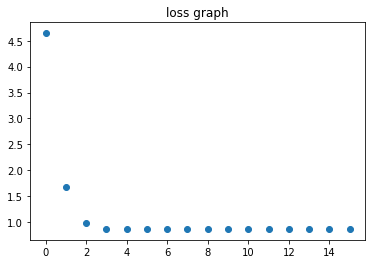

In [ ]:
plt.scatter(range(iteration + 1), loss)
plt.title('loss graph')
plt.show()

## **[Example - LASSO]**  
* **Least Absolute Selection and Shrinkage Opterator, LASSO**  
> + $\hat{\mathbf{\beta}}^{LASSO} = argmin_{\mathbf{\beta}}L_{\lambda}(\mathbf{\beta}) = argmin_{\mathbf{\beta}}\{\rVert\mathbf{y} - \mathbf{X\beta}\rVert^2/2 + \lambda \rVert\mathbf{\beta}\rVert_1\}$  
,for some constant $\lambda > 0$, where $\lambda$ is often called the tuning parameter.  
> + For each $j \le p$,  
$L_{\lambda}(\mathbf{\beta}) = (\mathbf{X}^{T}_j\mathbf{X}_j)\beta^2_j/2 - \mathbf{X}^T(\mathbf{y} - \mathbf{Z}_j\mathbf{\alpha}_j)\beta_j + \lambda|\beta_j| + (\mathbf{y} - \mathbf{Z}_j\mathbf{\alpha}_j)^T(\mathbf{y} - \mathbf{Z}_j\mathbf{\alpha}_j)/2 + \lambda\rVert\mathbf{\alpha}_j\rVert_1$  
> + Hence, $\hat{\beta}^{LASSO}_j = S_{\lambda/\mathbf{X}^T_j\mathbf{X}_j}(\mathbf{X}^T_j(\mathbf{y} - \mathbf{Z}_j\mathbf{\alpha}_j) / \mathbf{X}^T_j\mathbf{X}_j) = S_{\lambda/\mathbf{X}^T_j\mathbf{X}_j}(\hat{\beta}^{LSE}_j)$  
where $S_{\lambda} = sign(x)(|x| - \lambda)_{+}$ and $c_{+} = cI(c>0)$

In [ ]:
def softThresh(x, lam):
    ret = np.sign(x) * (np.abs(x) - lam) * (abs(x) > lam)
    return ret

In [ ]:
def lassoCD(y, X, lam, eps=1e-7, iter_max=1000):
    loss = []
    p = X.shape[1]
    bvec = np.zeros(p)
    idx = np.arange(0, p)
    for i in range(iter_max):
        cur_bvec = bvec.copy()
        for j in range(p):
            Z = X[:, idx != j]
            avec = bvec[idx != j]
            dn = np.sum(X[:, j]**2)
            up = np.sum(X[:, j] * (y - np.matmul(Z, avec)))
            bvec[j] = softThresh(up/dn, lam/dn)
        loss.append(np.sum((y - np.matmul(X, bvec))**2))
    return bvec, loss, i

In [ ]:
n = 10
p = 11
bvec = np.ones(p)
X = np.random.normal(0, 1, [n, p])
y = np.matmul(X, bvec) + np.random.normal(0, 1, n)
beta, loss, iteration = lassoCD(y, X, 1) 
beta

array([ 0.29266696,  1.20623952, -0.        , -0.        ,  0.47794823,
        1.05455985, -0.        ,  1.03838628,  0.77916843,  0.9635943 ,
        0.        ])

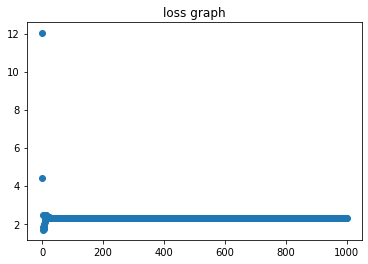

In [ ]:
plt.scatter(range(iteration + 1), loss)
plt.title('loss graph')
plt.show()

---
# **2. Gradient Descent Algorithm**

***Moving a point for a direction with a stepsize***  
* **Univariate function**  
>+ The first key idea is to understand "moving a point $x_n$ to $x_{n+1}$" as "choosing an equation" between (1) and (2)  
(1) : $x_{n+1} = x_n + \alpha \Rightarrow$ move to the right  
(2) : $x_{n+1} = x_n - \alpha \Rightarrow$ move to the left  
where $\alpha >0$ is very small positive constant  
>+ Hence, when $f$ is differentiable, $x_{n+1} = x_n - \alpha \nabla f(x_n)$  
>+ Move $x_n$ for a direction $-\nabla f(x_n)$ with a stepsize $\alpha > 0$  



* **Multivariate function**  
>+ when the function $f$ is multivariate, there are infinitely many directions to move.  
>+ **(Direction opposite to current gradient)**  
: Assume that $\nabla f(\mathbf{x}) \ne \mathbf{0}$ for some fixed point $\mathbf{x}$  
: Let $\mathbf{x}_{\alpha} = \mathbf{x} - \alpha \nabla f(\mathbf{x})$ then by the first order Taylor's expansion around $\mathbf{x}$, we have  
$f(\mathbf{x}_{\alpha}) = f(\mathbf{x}) + \nabla f(\mathbf{x})^T(\mathbf{x}_{\alpha}-\mathbf{x}) + o(\rVert \mathbf{x}_{\alpha}-\mathbf{x} \rVert)$  
$= f(\mathbf{x}) - \alpha \rVert \nabla f(\mathbf{x}) \rVert^2 + o(\alpha \rVert \nabla f(\mathbf{x}) \rVert^2)$  
$= f(\mathbf{x}) - \alpha \rVert \nabla f(\mathbf{x}) \rVert^2 + o(\alpha)$  
$\Rightarrow f(\mathbf{x}_{\alpha}) - f(\mathbf{x}) < -\alpha \rVert\nabla f(\mathbf{x}) \rVert^2 < 0$  
>+ **(General descent condition)**  
: Consider $\mathbf{x}_{\alpha}  = \mathbf{x} + \alpha \mathbf{d}$ ,$\forall \alpha >0$ where the direction $\mathbf{d}$ satisfies the descent condition where it makes an angle with $\nabla f(\mathbf{x})$ that is greater than 90 degrees,  
that is, $\nabla f(\mathbf{x})^T\mathbf{d} < 0$  
: By the Taylor's expansion, $f(\mathbf{x}_{\alpha}) - f(\mathbf{x}) < \alpha \nabla f(\mathbf{x})^T\mathbf{d} < 0$  
for all sufficiently small $\alpha > 0$

## **Algorithm**  
>1. Take an initial $\mathbf{x}_1$  
>2. For $n = 1, 2, \cdots, $  
    (1) Choose a direction $\mathbf{d}_n$ and a stepsize $\alpha_n$ and set $\mathbf{x}_{n+1} = \mathbf{x}_n + \alpha_n\mathbf{d}_n$  
>3. If $\rVert \mathbf{x}_{n+1} - \mathbf{x}_n \rVert < \epsilon$ then stop.  
>4. Set $\hat{\mathbf{x}} = \mathbf{x}_n$   

* **the key step is (1)**  
: If $\nabla f(\mathbf{x}_n)^T\mathbf{d}_n > 0$ then cannot guarantee the descent property.  
: If $\alpha_n$ is too small the convergence speed is too late.  


## **Selecting the descent direction**  
>* **General form of GD algorithm**  
: The most popular form of the GD algorithm is specified by $\mathbf{x}_{n+1} = \mathbf{x}_n - \alpha_n\mathbf{D}_n\nabla f(\mathbf{x}_n)$  
,where $\mathbf{D}_n$ is a strictly positive definite symmetric matrix and $\alpha_n$ is a stepsize.  
: $\mathbf{d}_n = -\mathbf{D}_n \nabla f(\mathbf{x})$  
$~\nabla f(\mathbf{x}_n)^T\mathbf{D}_n\nabla f(\mathbf{x}_n) > 0$ because of the strictly positive definiteness of $\mathbf{D}_n$  

>* **Steepest descent method**  
: $\mathbf{D}_n = \mathbf{I}_p \Rightarrow \mathbf{x}_{n+1} = \mathbf{x}_n - \alpha \nabla f(\mathbf{x}_n)$  
$~\nabla f(\mathbf{x}_n)^T\mathbf{d}_n \ge - \rVert \nabla f(\mathbf{x}_n) \rVert \rVert \mathbf{d}_n \rVert = -\rVert \nabla f(\mathbf{x}) \rVert < 0$ ,$\forall \rVert\mathbf{d}_n \rVert = 1$ by the Schwartz inequality  
: Hence, $\mathbf{d}_n = -\nabla f(\mathbf{x}_n) / \rVert\nabla f(\mathbf{x}_n) \rVert$ where the equality holds for the Schwartz inequality  
: the gradient direction is almost orthogonal to the direction for the minimum. Hence, the GD algorithm shows 'zig-zagging' behavior without making fast progress.  

>* **Newton's method**  
: Assume that $f$ is convex and twice differentiable  
: $\mathbf{D}_n = \nabla^2f(\mathbf{x}_n)^{-1} \Rightarrow \mathbf{x}_{n+1} = \mathbf{x}_n -\alpha_n \nabla^2f(\mathbf{x}_n)^{-1}\nabla f(\mathbf{x})$ ,where $\nabla^2f(\mathbf{x}_n)$ is strictly positive definite  
: typically converges vary fast and does not exhibit 'zig-zagging' behavior  

## **Newton-Raphson**  
* Newton-Raphson algorithm is a gradient descent algorithm when $\alpha_n = 1$ ,$\mathbf{D}_n = \nabla^2f(\mathbf{x}_n)^{-1} \Rightarrow \mathbf{x}_{n+1} = \mathbf{x}_n - \nabla^2f(\mathbf{x}_n)^{-1}\nabla f(\mathbf{x})$  
* Suppose $f : \mathit{D} \rightarrow \mathbb{R}^p$ is convex and twice differentiable, has second derivaton on $\mathit{D}$  
    + The second order approximation of $f$ at $\mathbf{x}_0$ becomes  
    $f(\mathbf{x}) \approx q(\mathbf{x}) = f(\mathbf{x}_0) + \nabla f(\mathbf{x}_0)^T(\mathbf{x} - \mathbf{x}_0) +(\mathbf{x} - \mathbf{x}_0)^T\nabla^2f(\mathbf{x}_0)(\mathbf{x} - \mathbf{x}_0)/2$ around $\mathbf{x}_n$  
    ,where $\nabla f(\mathbf{x}_0)$ is the gradient vector of $f$ at $\mathbf{x}_0$ and  $\nabla^2f(\mathbf{x}_0)$ is the Hessian matrix of $f$ at $\mathbf{x}_0$  
    + Minimizing the quadratic approximation $q$ around $\mathbf{x}_n$  
    + By taking the derivative to zero,  
    $\nabla f(\mathbf{x}_n) = \nabla^2f(\mathbf{x}_n)(\mathbf{x} - \mathbf{x}_n) = 0  \Leftrightarrow \mathbf{x} = \mathbf{x}_n - \nabla f(\mathbf{x}_n)^{-1} \nabla f(\mathbf{x}_n)$  
* Hence, the Newton-Raphson Algorithm can be thought of a successive minimization of quadratic approximations 
$\mathbf{x}_{n+1} = \mathbf{x}_n - \alpha \nabla^2f(\mathbf{x}_n)^{-1}\nabla f(\mathbf{x})$

## **[Example - LogisticRegression]**  
* The estimator(mle) is the minimizer of the logistic loss:  
$\hat{\mathbf{\beta}} = argmin_{\mathbf{\beta}}L(\mathbf{\beta})= argmin_{\mathbf{\beta}}\sum^{n}_{i=1}\{-y_i \mathbf{x}^T_i \mathbf{\beta} +log(1+exp(\mathbf{x}^T_i\mathbf{\beta}))\}$  
which can be obtained by modeling $f(\mathbf{x}^T_i\mathbf{\beta}) = exp(\mathbf{x}^T_i\mathbf{\beta}) / \{ 1+exp(\mathbf{x}^T_i\mathbf{\beta})\}$  
* $\nabla L(\mathbf{\beta}) = \sum^{n}_{i=1}[-y_i + exp(\mathbf{x}^T_i\mathbf{\beta}) / \{1+exp(\mathbf{x}^T_i\mathbf{\beta})\}]\mathbf{x}_i$

In [ ]:
def getLoss(y, X, bvec):
    xbvec = np.matmul(X, bvec)
    loss = -np.sum(y * xbvec) + np.sum(np.log(1 + np.exp(xbvec)))
    return loss

def getGrad(y, X, bvec):
    xbvec = np.minimum(np.matmul(X, bvec), 700)
    exbvec = np.exp(xbvec)
    pvec = exbvec / (1 + exbvec)
    grad = np.matmul(np.transpose(X), (pvec - y))
    return grad

def logisticGD(y, X, bvec, eps=1e-7, iter_max=1000):
    losses = []
    for i in range(iter_max):
        alpha = 1
        gvec = getGrad(y, X, bvec)
        loss = getLoss(y, X, bvec)
        losses.append(loss)
        # stepsize from the backtracking rule
        for j in range(iter_max):
            nbvec = bvec - alpha * gvec # new bvec
            if getLoss(y, X, nbvec) < loss: break
            alpha = alpha / 2
        if np.sum(np.abs(nbvec - bvec)) < eps: break
        bvec = nbvec.copy()
    return bvec, losses, i

In [ ]:
n = 100
p = 20
X = np.random.normal(0, 1, [n, p])
y = np.random.choice([0, 1], n, replace=True)
bvec = np.zeros(p)
betaGD, loss, iteration = logisticGD(y, X, bvec)
betaGD

array([-0.21986229, -0.24421996, -0.1642458 , -0.06291972,  0.18175028,
       -0.24288292, -0.33729176,  0.24733213, -0.31099921, -0.09760213,
       -0.11526062,  0.54991669, -0.25218506,  0.0630333 , -0.32395103,
        0.58067469, -0.12044125,  0.06332383, -0.62311939, -0.27509036])

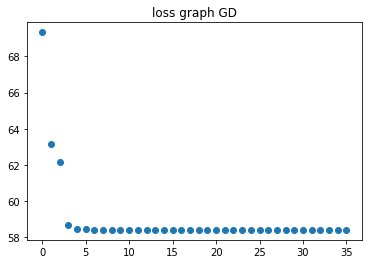

In [ ]:
plt.scatter(range(iteration + 1), loss)
plt.title('loss graph GD')
plt.show()

In [ ]:
def getHess(y, X, bvec):
    xbvec = np.minimum(np.matmul(X, bvec), 700)
    exbvec = np.exp(xbvec)
    pvec = exbvec / (1 + exbvec)
    wvec = pvec * (1 - pvec)
    hess = np.matmul(np.matmul(np.transpose(X), np.diag(wvec)), X)
    return hess

In [ ]:
def logisticNR(y, X, bvec, eps=1e-7, iter_max=1000):
    loss = []
    for i in range(iter_max):
        loss.append(getLoss(y, X, bvec))
        hess = getHess(y, X, bvec)
        grad = getGrad(y, X, bvec)
        nbvec = bvec - np.matmul(np.linalg.inv(hess), grad) # new bvec
        if np.sum(np.abs(nbvec - bvec)) < eps: break
        bvec = nbvec
    return bvec, loss, i

In [ ]:
betaNR, loss, iteration = logisticNR(y, X, bvec)
betaNR

array([-0.21986231, -0.24421997, -0.1642458 , -0.06291973,  0.18175029,
       -0.24288293, -0.33729175,  0.24733214, -0.31099922, -0.09760213,
       -0.11526063,  0.5499167 , -0.25218507,  0.0630333 , -0.32395102,
        0.58067469, -0.12044125,  0.06332384, -0.62311941, -0.27509037])

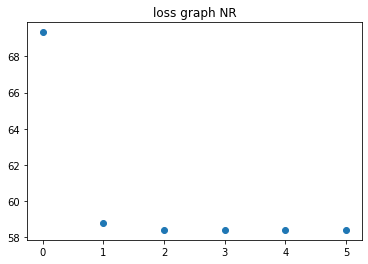

In [ ]:
plt.scatter(range(iteration + 1), loss)
plt.title('loss graph NR')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
clf = LogisticRegression(penalty='none', solver='newton-cg')
clf.fit(X, y)
betaLR = clf.coef_.squeeze()
betaLR

array([-0.24081419, -0.24251558, -0.17889902, -0.07141892,  0.19928645,
       -0.23724011, -0.32752683,  0.24444699, -0.29836145, -0.12410976,
       -0.10930502,  0.54399663, -0.23151879,  0.06068003, -0.31219749,
        0.62430111, -0.11412448,  0.04836757, -0.60472988, -0.27958893])

In [ ]:
pd.DataFrame([betaGD, betaNR, betaLR], index=['GD', 'NR', 'newton-cg']).transpose()

,GD,NR,newton-cg
0,-0.219862,-0.219862,-0.240814
1,-0.244220,-0.244220,-0.242516
2,-0.164246,-0.164246,-0.178899
3,-0.062920,-0.062920,-0.071419
4,0.181750,0.181750,0.199286
5,-0.242883,-0.242883,-0.237240
6,-0.337292,-0.337292,-0.327527
7,0.247332,0.247332,0.244447
8,-0.310999,-0.310999,-0.298361
9,-0.097602,-0.097602,-0.124110


---
# **3. Modified local quadratic approximation algorithm**

Let $f : \mathbb{R}^p \rightarrow \mathbb{R}$ be a convex function  
* **local linear approximation function $l$ of $f$ at $\mathbf{x} = \mathbf{x}^c$**  
$f_{l}(\mathbf{x}|\mathbf{x}^c) = f(\mathbf{x}^c) + \nabla f(\mathbf{x}^c)^T(\mathbf{x}-\mathbf{x}^c)$  
    + $\nabla f(\mathbf{x}^c)$ : gradient vector of $f$ at $\mathbf{x}^c$  
    + gradient dexcent algorithm  $\mathbf{x}^{\alpha} = \mathbf{x}^c - \alpha \nabla f(\mathbf{x}^c)$, with a step size $\alpha > 0$  
* **local quadratic approximation function $q$ of $f$ at $\mathbf{x} = \mathbf{x}^c$**  
$f_q(\mathbf{x}|\mathbf{x}^c) = f(\mathbf{x}^c) + \nabla f(\mathbf{x}^c)^T(\mathbf{x} - \mathbf{x}^c) + (\mathbf{x} - \mathbf{x}^c)^T\nabla^2f(\mathbf{x}^c)(\mathbf{x} - \mathbf{x}^c)/2$  
    + $\nabla^2f(\mathbf{x}^c)$ : Hessian matirx of $f$ at $\mathbf{x}^c$  
    + Newton-Raphson algorithm $\mathbf{x}^n = \mathbf{x}^c - \nabla^2f(\mathbf{x}^c)^{-1}\nabla f(\mathbf{x}^c) = argmin_{\mathbf{x}}f_{q}(\mathbf{x}|\mathbf{x}^c)$  
    

Newton-Raphson Algorithm may fail to descent, that is, $f(\mathbf{x}^{new}) > f(\mathbf{x}^{current})$  
* general Newton-Raphson Algorithm ; $\mathbf{x}^{\alpha} = \mathbf{x}^c - \alpha \nabla^2 f(\mathbf{x}^c)^{-1} \nabla f(\mathbf{x}^c) \ne \mathbf{x}^n$  , with a step size $\alpha > 0$  
* If $\mathbf{x}^c$ is not the minimizer of $f$ then there exists $\alpha > 0$ such that $f(\mathbf{x}^{\alpha}) < f(\mathbf{x}^c)$  
where $\mathbf{x}^{\alpha} = \mathbf{x}^c - \alpha \nabla^2 f(\mathbf{x}^c)^{-1}\nabla f(\mathbf{x}^c) = \mathbf{x}^c - \alpha(\mathbf{x}^c - \mathbf{x}^n)$  
$=\alpha \mathbf{x}^n + (1-\alpha)\mathbf{x}^c$  
    + $\mathbf{x}^c$ is not a minimizer of $f$ so that $\nabla f_q(\mathbf{x}^c | \mathbf{x}^c) = \nabla f(\mathbf{x}^c) \ne \mathbf{0}$  
    + Hence $\mathbf{x}^c$ is not a minimizer of $q$ which implies $f_q(\mathbf{x}^n|\mathbf{x}^c) < f_q(\mathbf{x}^c | \mathbf{x}^c)$  
    + From the convexity of $f_q$ ,for any $\alpha \in (0, 1]$  
    $f_q(\mathbf{x}^{\alpha}|\mathbf{x}^c) = f_q(\alpha \mathbf{x}^n + (1-\alpha)\mathbf{x}^c | \mathbf{x}^c) \le \alpha f_q(\mathbf{x}^n | \mathbf{x}^c) + (1-\alpha)f_q(\mathbf{x}^c | \mathbf{x}^c)$  
    + Hence $f_q(\mathbf{x}^{\alpha} | \mathbf{x}^c) - f_q(\mathbf{x}^c | \mathbf{x}^c) \le \alpha(f_q(\mathbf{x}^n|\mathbf{x}^c) - f_q(\mathbf{x}^c | \mathbf{x}^c))$  
    + using the fact that $\nabla f(\mathbf{x}^c) = \nabla f_q(\mathbf{x}^c | \mathbf{x}^c)$,  
    $\lim_{\alpha \to \infty}\frac{f(\mathbf{x}^{\alpha}) - f(\mathbf{x}^c)}{\alpha} = \lim_{\alpha \to \infty}\frac{f(\mathbf{x}^{\alpha}|\mathbf{x}^c) - f(\mathbf{x}^c|\mathbf{x}^c)}{\alpha} \le f_q(\mathbf{x}^n | \mathbf{x}^c) - f_q(\mathbf{x}^c|\mathbf{x}^c) < 0$

## **Algorithm**  
>1. Set an initial $\mathbf{x}_1$  
2. For $n \ge 1$ ,repeat the followings until convergence.  
    (1) Let $\mathbf{x}_{\alpha} = \mathbf{x}_n -\nabla^2f(\mathbf{x}_n)^{-1}\nabla f(\mathbf{x}_n)$  
    (2) If $f(\mathbf{x}_{\alpha}) < f(\mathbf{x}_n)$ then set $\mathbf{x}_{n+1} = \mathbf{x}_{\alpha}$  
    (3) Else set $\mathbf{x}_{n+1} = \mathbf{x}_{\alpha}$ ,where $\alpha = argmin_{h \in [0, 1]}f(h\mathbf{x}_{\alpha} + (1-h)\mathbf{x}_n)$